<a href="https://colab.research.google.com/github/dhruvsbe/handwriting_recognition/blob/main/HandwritingRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [73]:
nb_classes = 10
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
print("X_train Original Shape:", X_train.shape)
print("Y_train Original Shape:", Y_train.shape)

X_train Original Shape: (60000, 28, 28)
Y_train Original Shape: (60000,)


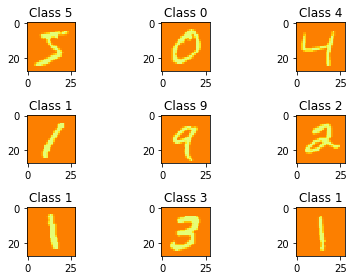

In [77]:
for i in range(9):
    plt.subplot(3,3,i+1) # drawing different subplots 
    plt.imshow(X_train[i], cmap='Wistia_r', interpolation='none') # displaying the data as a image
    plt.title("Class {}".format(Y_train[i])) # adding a label/title to every picture 
plt.tight_layout()

In [36]:
print(X_train[0]) # prints raw data for testing dataset
print("Shape: " + str(X_train[0].shape)) # prints matrix shape for training data set

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [37]:
X_train = X_train.reshape(60000, 784) # reshaping training set from 28x28 images to single 784 dimensional vector
X_test = X_test.reshape(10000, 784) # reshaping testing set from 28x28 images to single 784 dimensional vector

In [38]:
X_train = X_train.astype('float32') # setting traning set to float32
X_test = X_test.astype('float32') # setting testing set to float32
X_train /= 255 # normalize the pixel values to be from [0->1] instead of [0->255] for the training dataset
X_test /= 255 # normalize the pixel values to be from [0->1] instead of [0->255] for the testing dataset

In [39]:
print("Training Matrix Shape:", X_train.shape) # checking if training set input matrices have the correct shape
print("Testing Matrix Shape:", X_test.shape) # checking if testing set input matrices have the correct shape

Training Matrix Shape: (60000, 784)
Testing Matrix Shape: (10000, 784)


In [40]:
Y_train = tf.keras.utils.to_categorical(Y_train, nb_classes) # encoding training set
Y_test = tf.keras.utils.to_categorical(Y_test, nb_classes) # encoding testing set

In [41]:
print(X_train[0])
print(Y_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [42]:
model = tf.keras.Sequential([
                              tf.keras.layers.Dense(512, input_shape=(784,)),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dropout(0.2),
                              tf.keras.layers.Dense(10),
                              tf.keras.layers.Activation('softmax')
]) # creating a 3 layer sequential neural network using keras

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # setting loss function, optimizer, and metrics for model

In [45]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4, verbose=1,
          validation_data=(X_test, Y_test)) # feeding the data into the model

Epoch 1/4
469/469 [==============================] - 5s 9ms/step - loss: 0.2872 - accuracy: 0.9167 - val_loss: 0.1346 - val_accuracy: 0.9601
Epoch 2/4
469/469 [==============================] - 4s 9ms/step - loss: 0.1207 - accuracy: 0.9645 - val_loss: 0.0976 - val_accuracy: 0.9699
Epoch 3/4
469/469 [==============================] - 4s 9ms/step - loss: 0.0826 - accuracy: 0.9759 - val_loss: 0.0843 - val_accuracy: 0.9735
Epoch 4/4
469/469 [==============================] - 4s 9ms/step - loss: 0.0615 - accuracy: 0.9814 - val_loss: 0.0736 - val_accuracy: 0.9774


In [46]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
print('Test score:', score[0])
print('Test accuracy:', score[1]) # checking our accuracy

[0.07359686493873596, 0.977400004863739]
Test score: 0.07359686493873596
Test accuracy: 0.977400004863739


In [47]:
# making predictions
predictions = model.predict(X_test) 
print(predictions[0]) # printing probabilities that a image belongs to a slot class

[8.86777684e-07 4.95928774e-08 1.12461730e-05 2.78692227e-04
 1.70711989e-09 2.64290748e-07 1.08020440e-10 9.99694228e-01
 1.00180941e-07 1.44683545e-05]


In [48]:
predicted_classes = np.argmax(predictions, axis=-1)
print(predicted_classes)

[7 2 1 ... 4 5 6]


In [49]:
# checking what was right/wrong
Y_test = np.argmax(Y_test, axis=-1)
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]

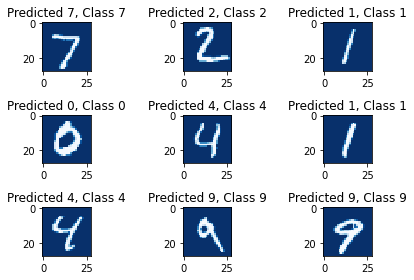

In [67]:
# printing plot of correct predictions
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='Blues_r', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct]))
plt.tight_layout()

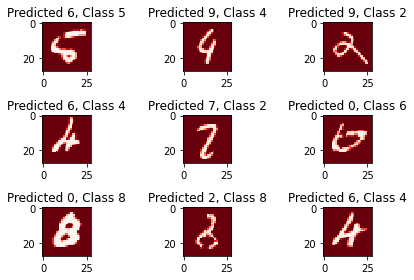

In [64]:
# printing plot of incorrect predictions
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='Reds_r', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect]))

plt.tight_layout()